# 3-Image Completion
in this question we want to fill the hole , using texture synthesis 
about 90% of this question is to have texture synthesis function that we made in question 2 . so the only challenging point is that in some filling region, we have three or four overlaps that we should handle it .  


first of all we show the origianl images : 
<table><tr>
<td> <img src="im03.jpg" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>

<table><tr>
<td> <img src="im04.jpg" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>
    
our goal is to fill this black rectangular hole properly . 

* first we choose a proper window (a little , bigger than the hole) :
    
* after that we fill this hole exactly like what we do in previous question (texture synthesis) .

* now, we attached rectangular_filled box to original image : 


* we have to find two boundary_cut for right and down overlap : 
so we make two overlaps and compare them with the original image before synthesizing , at the end we get two boundary cuts with a intersection , but we can handle this intersection by filling the pixels above the boundary cut , using pixels of original image  : 
we can see the changes below after considering the best boundary


 $\color{red}{\text{* note that i don't discuss about functions in this question beacuse all of the functions that used in  }}$
  $\color{red}{\text{this question are the functions used in prevoius question and discussed in report of question 2}}$


below is the part of code that you can change the picture you want to  inpaint : 
    

In [13]:
image1 = cv2.imread('im03.jpg')

## final code 
below is the whole code of this question : 


In [14]:
from PIL.Image import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import size
import random

from numpy.lib.type_check import imag

# ------------------------------------
# ------------------------------------
# verical find patch


def find_path_vertical(overlap):
    [c1, c2] = np.array(overlap).shape

    matrix1_score = np.zeros([c1, c2])
    matrix1_score[0, :] = overlap[0, :]

    matrix_index = np.zeros([c1, c2])

    for x in range(1, c1):
        for y in range(0, c2):
            num1, num2, num3 = np.ones([3, 1])*100000000
            num2 = overlap[x, y]+matrix1_score[x-1, y]
            if(y-1 >= 0):
                num1 = overlap[x, y]+matrix1_score[x-1, y-1]

            if(y+1 < c2):
                num3 = overlap[x, y]+matrix1_score[x-1, y+1]

            array_temp = [num1, num2, num3]
            index = (np.where(array_temp == np.min(array_temp)))
            matrix_index[x, y] = index[0][0]
            matrix1_score[x, y] = np.min(array_temp)

    temp = np.where(np.min(matrix1_score[c1-1, :]) == matrix1_score)
    end_pos = temp[1][0]

    x_r = np.zeros([c1])
    x_r[0] = 0

    y_r = np.zeros([c1])
    y_r[c1-1] = end_pos

    for x in range(c1-1, 0, -1):

        x_r[x] = x

        if(matrix_index[x, int(y_r[x])] == 0):
            y_r[x-1] = y_r[x]-1

        if(matrix_index[x, int(y_r[x])] == 1):
            y_r[x-1] = y_r[x]

        if(matrix_index[x, int(y_r[x])] == 2):
            y_r[x-1] = y_r[x]+1

    return x_r, y_r


# -----------------------------------
# ------------------------------------
# horizental find patch

def find_path_horizental(overlap):
    [c1, c2] = np.array(overlap).shape

    matrix1_score = np.zeros([c1, c2])
    matrix1_score[:, 0] = overlap[:, 0]

    matrix_index = np.zeros([c1, c2])

    for y in range(1, c2):
        for x in range(0, c1):
            num1, num2, num3 = np.ones([3, 1])*100000000
            num2 = overlap[x, y]+matrix1_score[x, y-1]
            if(x-1 >= 0):
                num1 = overlap[x, y]+matrix1_score[x-1, y-1]

            if(x+1 < c1):
                num3 = overlap[x, y]+matrix1_score[x+1, y-1]

            array_temp = [num1, num2, num3]
            index = (np.where(array_temp == np.min(array_temp)))
            matrix_index[x, y] = index[0][0]
            matrix1_score[x, y] = np.min(array_temp)

    temp = np.where(np.min(matrix1_score[:, c2-1]) == matrix1_score)
    end_pos = temp[0][0]

    y_r = np.zeros([c2])
    y_r[0] = 0

    x_r = np.zeros([c2])
    x_r[c2-1] = end_pos

    for x in range(c2-1, 0, -1):

        y_r[x] = x

        if(matrix_index[int(x_r[x]), x] == 0):
            x_r[x-1] = x_r[x]-1

        if(matrix_index[int(x_r[x]), x] == 1):
            x_r[x-1] = x_r[x]

        if(matrix_index[int(x_r[x]), x] == 2):
            x_r[x-1] = x_r[x]+1

    return x_r, y_r


# ----------------------------------

<ipython-input-14-eac8d7c72b68>:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  index = (np.where(array_temp == np.min(array_temp)))
<ipython-input-14-eac8d7c72b68>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  index = (np.where(array_temp == np.min(array_temp)))


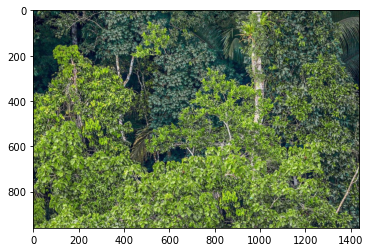

In [15]:
[c1, c2, c3] = np.array(image1).shape

image1_gray = cv2.cvtColor(image1[:c1-70, :c2-70, :], cv2.COLOR_BGR2GRAY)

image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if(c1 == 960):
    jj = 3
    x_cor = [316, 566, 316, 566, 1100, 1250, 1100, 1250, 750, 950, 750, 950]
    y_cor = [20, 20, 170, 170, 600, 600, 700, 700, 758, 758, 908, 908]

if(c1 == 2355):
    jj = 1
    x_cor = [695, 945, 695, 945]
    y_cor = [640, 640, 1140, 1140]


for j in range(0, jj):

    # for threes
    a = np.array([x_cor[4*j], y_cor[4*j]])
    b = np.array([x_cor[4*j+1], y_cor[4*j+1]])
    c = np.array([x_cor[4*j+2], y_cor[4*j+2]])
    d = np.array([x_cor[4*j+3], y_cor[4*j+3]])

# ''' cordinates :

# a-----------b
# -------------
# -------------
# c-----------d

# '''

    width_ab = int(np.sqrt(np.sum((a-b)**2)))
    width_cd = int(np.sqrt(np.sum((c-d)**2)))
    height_ac = int(np.sqrt(np.sum((a-c)**2)))
    height_bd = int(np.sqrt(np.sum((b-d)**2)))
# ---------------------------------
    output_height = max(height_ac, height_bd)
    output_width = max(width_ab, width_cd)

    f = np.zeros([output_height, output_width, 3])

    if(j == 0):
        truncated_image = np.copy(image1)
        truncated_image = cv2.cvtColor(truncated_image, cv2.COLOR_BGR2RGB)

    truncated_image[int(a[1]):int(a[1]+output_height),
                    int(a[0]):int(a[0]+output_width), :] = f
    truncated_image = np.array(truncated_image)
    [c1, c2, c3] = truncated_image.shape
    truncated_image_gray = cv2.cvtColor(
        truncated_image[:c1-50, :c2-50, :], cv2.COLOR_RGB2GRAY)

    k1_param = output_height//50+2  # iteration in x axis

    k2_param = output_width//50+2  # iteration in y axis

    paramter1 = output_height % 50
    paramter2 = output_width % 50


# -----------------------------------------

    synthesis_image = truncated_image[int(
        a[1]-20):int(c[1]+50), int(a[0]-20):int(b[0]+50), :]

    for k1 in range(1, int(k1_param)):

        for k2 in range(1, int(k2_param)):

            synthesis_image_copy = np.copy(synthesis_image)

            # ---------------------------------------------

            portion1 = np.copy(
                synthesis_image_copy[(k1-1)*50:(k1-1)*50+20, (k2-1)*50:(k2-1)*50+70, :])  # upper overlap
            gray_portion1 = np.array(cv2.cvtColor(
                portion1.astype('uint8'), cv2.COLOR_RGB2GRAY))

            scores1 = cv2.matchTemplate(
                image1_gray, gray_portion1, cv2.TM_CCOEFF_NORMED)

            # --------------------------------------------

            portion2 = np.copy(
                synthesis_image_copy[(k1-1)*50:(k1-1)*50+70, (k2-1)*50:(k2-1)*50+20, :])  # left overlap
            gray_portion2 = np.array(cv2.cvtColor(
                portion2.astype('uint8'), cv2.COLOR_RGB2GRAY))

            scores2 = cv2.matchTemplate(
                image1_gray, gray_portion2, cv2.TM_CCOEFF_NORMED)

            # -------------------------------------------------
            [c1, c2] = np.array(scores1).shape
            [c11, c22] = np.array(scores2).shape
            height = min(int(c1), int(c11))
            width = min(int(c2), int(c22))
            scores_total = np.zeros([height, width])
            scores_total = scores1[0:height, 0:width] + \
                scores2[0:height, 0:width]

            scores_total[max(int(a[1]-70), 0):int(c[1]),
                         max(int(a[0]-70), 0):int(b[0])] = 0

            for treshhold in np.arange(1, 0, -0.001):
                ff = np.where(scores_total >= treshhold)
                number_of_candidates1 = (size(ff[1]))
                if(number_of_candidates1 >= 1):
                    break
            num11 = random.randint(0, int(number_of_candidates1)-1)

            sample_n = truncated_image[ff[0][num11]:ff[0][num11] +
                                       70, ff[1][num11]:ff[1][num11]+70, :]

            synthesis_image[int((k1-1)*50): int((k1-1)*50)+70, int((k2-1) *
                            50): int((k2-1)*50)+70, :] = sample_n[:, :, :]

            # --------------------upper overlap
            gray_sample1 = cv2.cvtColor(
                portion1.astype('uint8'), cv2.COLOR_RGB2GRAY)

            gray_sample_n1 = cv2.cvtColor(
                sample_n[0:20, :, :].astype('uint8'), cv2.COLOR_RGB2GRAY)

            overlap1 = (gray_sample1-gray_sample_n1)**2
            x_u, y_u = find_path_horizental(overlap1)

            # ------------------- left overlap
            gray_sample2 = cv2.cvtColor(
                portion2.astype('uint8'), cv2.COLOR_RGB2GRAY)
            gray_sample_n2 = cv2.cvtColor(
                sample_n[:, 0:20, :].astype('uint8'), cv2.COLOR_RGB2GRAY)

            overlap2 = (gray_sample2-gray_sample_n2)**2
            x_l, y_l = find_path_vertical(overlap2)

            # ---------------------

            # horizental
            for xx in range(0, 70):

                synthesis_image[int((k1-1)*50):int((k1-1)*50+x_u[xx]), int((k2-1)*50+xx),
                                :] = synthesis_image_copy[int((k1-1)*50):int((k1-1)*50+x_u[xx]), int((k2-1)*50+xx), :]

            # vertical
            for hh in range(0, 70):

                synthesis_image[int(k1-1)*50+hh, int((k2-1)*50):int((k2-1)*50+y_l[hh]):,
                                :] = synthesis_image_copy[int(k1-1)*50+hh, int((k2-1)*50):int((k2-1)*50+y_l[hh]), :]

    truncated_image[int(a[1])-20:int(a[1]+output_height+50),
                    int(a[0]-20):int(a[0]+output_width)+50, :] = synthesis_image

# -----------------------------------------------------------------
# down overlap(hozrizental)
    portion_down_trunc = truncated_image[int(
        a[1]+output_height):int(a[1]+output_height+50), int(a[0]):int(a[0]+output_width+50), :]

    portion_down_trunc_gray = cv2.cvtColor(
        portion_down_trunc.astype('uint8'), cv2.COLOR_RGB2GRAY)

    portion_down_original = image1[int(
        a[1]+output_height):int(a[1]+output_height+50), int(a[0]):int(a[0]+output_width+50), :]

    portion_down_original_gray = cv2.cvtColor(
        portion_down_original.astype('uint8'), cv2.COLOR_RGB2GRAY)

    overlap_r = (portion_down_original_gray-portion_down_trunc_gray)**2

    x_f2, y_f2 = find_path_horizental(overlap_r)

# ---------------------------------------------------------------
# right overlap(vertical)
    portion_right_trunc = truncated_image[int(a[1]):int(
        a[1]+output_height+50), int(b[0]):int(b[0]+50), :]

    portion_right_trunc_gray = cv2.cvtColor(
        portion_right_trunc.astype('uint8'), cv2.COLOR_RGB2GRAY)

    portion_right_original = image1[int(a[1]):int(
        a[1]+output_height+50), int(b[0]):int(b[0]+50), :]

    portion_right_original_gray = cv2.cvtColor(
        portion_right_original.astype('uint8'), cv2.COLOR_RGB2GRAY)

    overlap_rr = (portion_right_original_gray-portion_right_trunc_gray)**2

    x_f1, y_f1 = find_path_vertical(overlap_rr)

# -----------------------------------------------------------------
# ----------------------------------------------------------------
# -----------------------------------------------------------------
# reconstruct down overlap (horizental)
    for xxx in range(0, output_width+50):
        truncated_image[int(c[1]+x_f2[xxx]+10):int(c[1]+50), int(a[0]+xxx),
                        :] = image2[int(c[1]+x_f2[xxx]+10):int(c[1]+50), int(a[0]+xxx), :]

        truncated_image[int(c[1]+x_f2[xxx]+1):int(c[1]+10), int(a[0]+xxx),
                        :] = 0.9*image2[int(c[1]+x_f2[xxx]+1):int(c[1]+10), int(a[0]+xxx), :] + 0.1*truncated_image[int(c[1]+x_f2[xxx]+1):int(c[1]+10), int(a[0]+xxx), :]

        truncated_image[int(c[1]+x_f2[xxx]-10):int(c[1])+1, int(a[0]+xxx),
                        :] = 0.1*image2[int(c[1]+x_f2[xxx]-10):int(c[1])+1, int(a[0]+xxx), :] + 0.9*truncated_image[int(c[1]+x_f2[xxx]-10):int(c[1])+1, int(a[0]+xxx), :]


# ------------------------------------------------------------------
# reconstruct right overlap (vertical)
    for hhh in range(0, int(output_height+50)):
        truncated_image[int(a[1]+hhh), int(b[0]+y_f1[hhh]):int(b[0]+50),
                        :] = image2[int(a[1]+hhh), int(b[0]+y_f1[hhh]):int(b[0]+50), :]

# ------------------------------------------------------------------


plt.imshow(truncated_image)
plt.show()
plt.imsave('result.jpg', truncated_image)


# final results
below you can see the final results:
<table><tr>
<td> <img src="im03.jpg" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="res15.jpg" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>



<table><tr>
<td> <img src="im04.jpg" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="res16.jpg" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>
